In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('aapl_stock_1yr.csv')
df.head()



,Date,Close,Volume,Open,High,Low
0,3/3/2023,$151.03,70732300,$148.05,$151.11,$147.33
1,3/2/2023,$145.91,52279760,$144.38,$146.71,$143.90
2,3/1/2023,$145.31,55478990,$146.83,$147.23,$145.01
3,2/28/2023,$147.41,50547000,$147.05,$149.08,$146.83
4,2/27/2023,$147.92,44998470,$147.71,$149.17,$147.45


In [207]:
df.tail(7)

,Date,Close,Volume,Open,High,Low
12,2/14/2023,$153.20,61707570,$152.12,$153.77,$150.86
13,2/13/2023,$153.85,62199010,$150.95,$154.26,$150.92
14,2/10/2023,$151.01,57450710,$149.46,$151.34,$149.22
15,2/9/2023,$150.87,56007140,$153.78,$154.33,$150.42
16,2/8/2023,$151.92,64120080,$153.88,$154.58,$151.17
17,2/7/2023,$154.65,83322550,$150.64,$155.23,$150.64
18,2/6/2023,$151.73,69858310,$152.58,$153.10,$150.78


In [208]:
df = df[['Date', 'Close']]
df.head()

#get rid of the $ symbol in our values
df = df.replace({'\$':''}, regex = True)

#convert 'Close' to a float, and 'Date' to a Date
df = df.astype({"Close": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes
df.index = df['Date']
df.head()

,Date,Close
Date,,
2023-03-03,2023-03-03,151.03
2023-03-02,2023-03-02,145.91
2023-03-01,2023-03-01,145.31
2023-02-28,2023-02-28,147.41
2023-02-27,2023-02-27,147.92


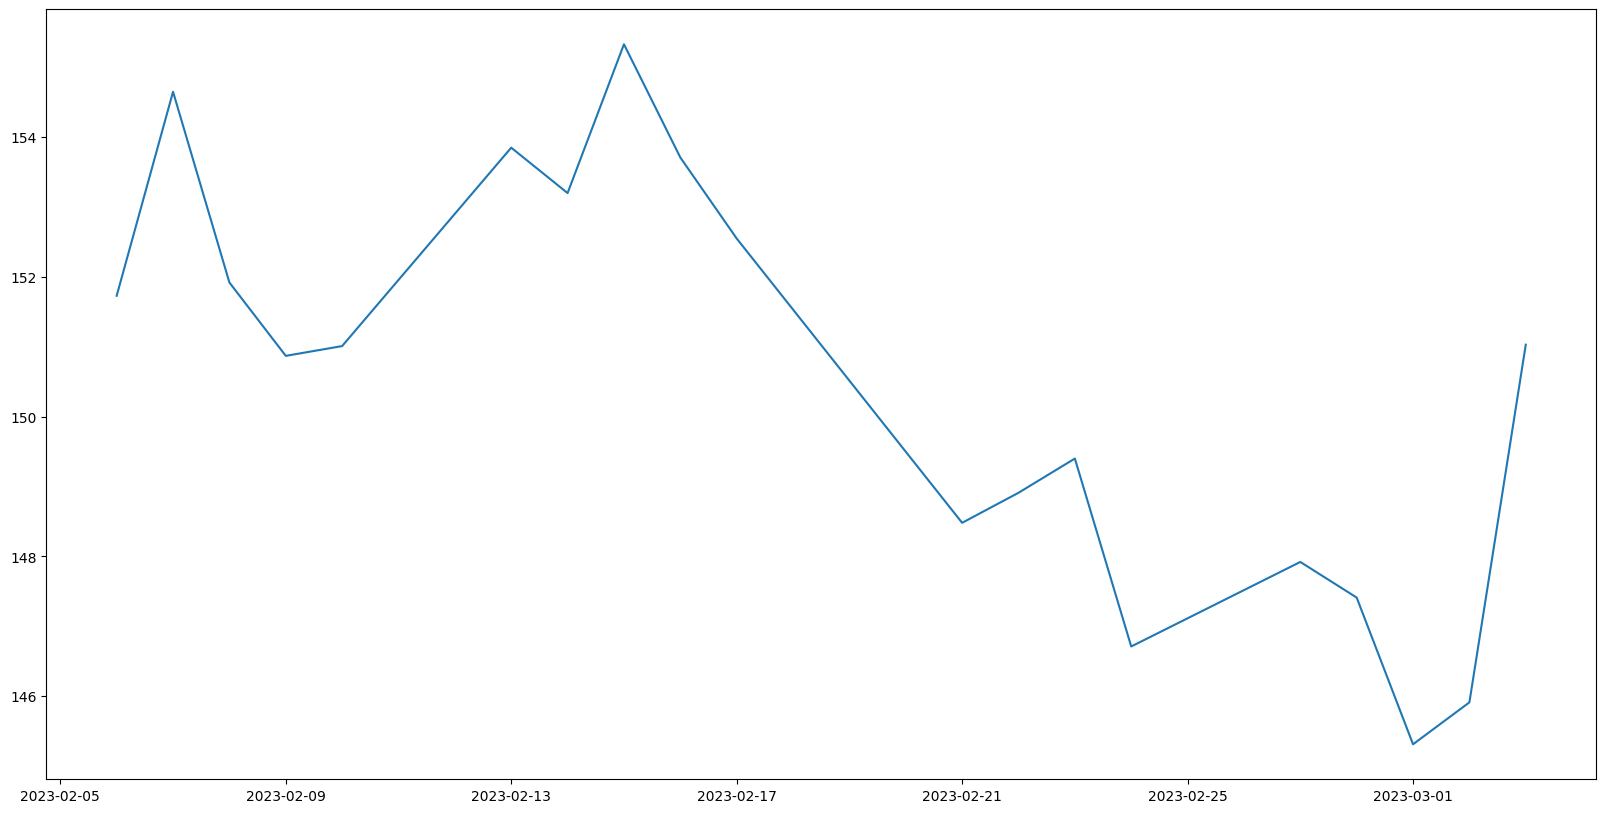

In [209]:
#define the index of our table
df.index = df['Date']
plt.plot(df["Close"],label='Close Price history')


In [210]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Close"][i]=df["Close"][i]
print('Length of Data: ', len(data))
data.head()

Length of Data:  19


,Date,Close
0,2023-02-06 00:00:00,151.73
1,2023-02-07 00:00:00,154.65
2,2023-02-08 00:00:00,151.92
3,2023-02-09 00:00:00,150.87
4,2023-02-10 00:00:00,151.01


In [211]:
#Min-Max Scaler
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop("Date",axis=1,inplace=True)
final_data = data.values
#print('final data', final_data)
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
#print('train data', train_data)
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data_cleaned = np.array(x_train_data)
"""
print(len(train_data))
print(x_train_data)
print(y_train_data)
print(scaled_data)
"""
print(len(x_train_data_cleaned.shape))
print(x_train_data_cleaned.shape[1])
"""
x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1],1))
"""

1


IndexError: tuple index out of range

In [ ]:
#defining LTSM model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)
print(x_train_data)
"""

"""



IndexError: tuple index out of range

In [ ]:
#prepare the training and test data
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

KeyError: 'pop from an empty set'

In [ ]:
#run the model
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

In [ ]:
train_data=data[:200]
valid_data=data[200:]
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])